In [17]:
%env DISPLAY=:0.0
%env OMP_NUM_THREADS=1
%env NUMEXPR_MAX_THREADS=16
%env MKL_NUM_THREADS=1
%env NUMEXPR_NUM_THREADS=1

env: DISPLAY=:0.0
env: OMP_NUM_THREADS=1
env: NUMEXPR_MAX_THREADS=16
env: MKL_NUM_THREADS=1
env: NUMEXPR_NUM_THREADS=1


In [18]:
import sys
sys.path.append("../zusammen/utils")
from sim2fits import AnalysisBuilder

SynthGRB_0


2020-12-20 18:52:10 Francescas-MacBook-Pro.local astropy[84902] WARNING VerifyWarning: Card is too long, comment will be truncated.
2020-12-20 18:52:10 Francescas-MacBook-Pro.local astropy[84902] WARNING AstropyDeprecationWarning: "clobber" was deprecated in version 2.0 and will be removed in a future version. Use argument "overwrite" instead.

WARNING UserWarning: The TTE file SynthGRB_0/tte_SynthGRB_0_n8.fits contains duplicate time tags and is thus invalid. Contact the FSSC 


WARNING UserWarning: The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX'


WARNING RuntimeWarning: Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (4.910734176635742)




WARNING UserWarning: The TTE file SynthGRB_0/tte_SynthGRB_0_nb.fits contains duplicate time tags and is thus invalid. Contact the FSSC 


WARNING UserWarning: The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX'


WARNING RuntimeWarning: Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (4.372635364532471)




WARNING UserWarning: The TTE file SynthGRB_0/tte_SynthGRB_0_n9.fits contains duplicate time tags and is thus invalid. Contact the FSSC 


WARNING UserWarning: The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX'


WARNING RuntimeWarning: Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (4.3900532722473145)




WARNING UserWarning: The TTE file SynthGRB_0/tte_SynthGRB_0_b1.fits contains duplicate time tags and is thus invalid. Contact the FSSC 


WARNING UserWarning: The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX'




SynthGRB_1


2020-12-20 18:52:15 Francescas-MacBook-Pro.local astropy[84902] WARNING VerifyWarning: Card is too long, comment will be truncated.
2020-12-20 18:52:15 Francescas-MacBook-Pro.local astropy[84902] WARNING AstropyDeprecationWarning: "clobber" was deprecated in version 2.0 and will be removed in a future version. Use argument "overwrite" instead.

WARNING UserWarning: The TTE file SynthGRB_1/tte_SynthGRB_1_nb.fits contains duplicate time tags and is thus invalid. Contact the FSSC 


WARNING UserWarning: The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX'


WARNING RuntimeWarning: Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (4.372635364532471)




WARNING UserWarning: The TTE file SynthGRB_1/tte_SynthGRB_1_na.fits contains duplicate time tags and is thus invalid. Contact the FSSC 


WARNING UserWarning: The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX'


WARNING RuntimeWarning: Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (3.6785571575164795)




WARNING UserWarning: The TTE file SynthGRB_1/tte_SynthGRB_1_n6.fits contains duplicate time tags and is thus invalid. Contact the FSSC 


WARNING UserWarning: The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX'




WARNING UserWarning: The TTE file SynthGRB_1/tte_SynthGRB_1_b1.fits contains duplicate time tags and is thus invalid. Contact the FSSC 


WARNING UserWarning: The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX'



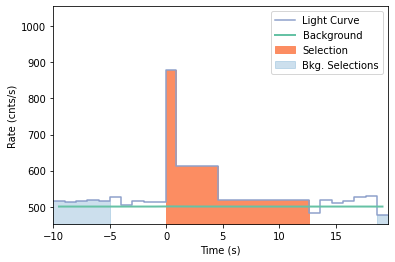

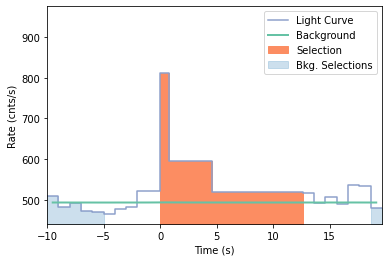

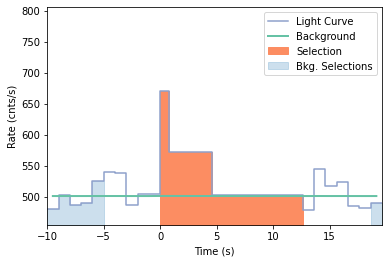

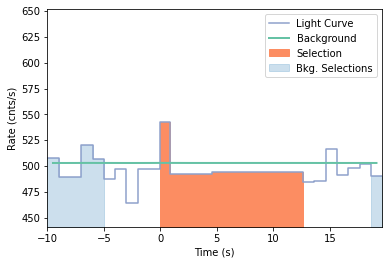

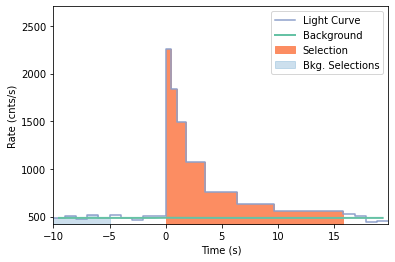

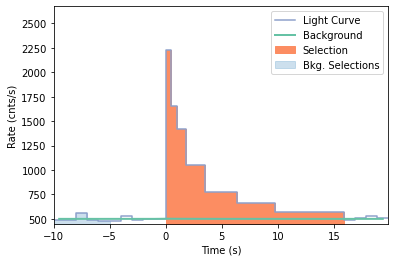

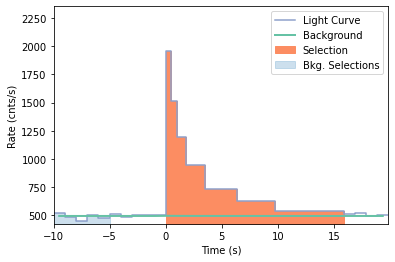

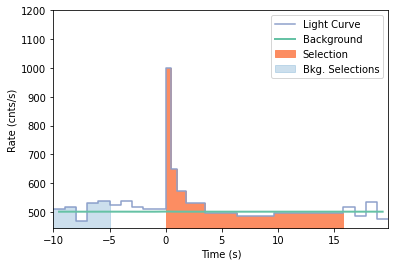

In [19]:
analysis_builder = AnalysisBuilder("data/grb_pop_survey.h5", use_bb=True, 
                                   select_grbs=None)

## Debug

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from threeML import *

In [21]:
def get_plugins(grb_name, dets, interval):
    plugin_list = []
    for det in dets:
        pha_file = os.path.join(grb_name, det + ".pha")
        rsp_file = os.path.join(grb_name, det + ".rsp")
        bak_file = os.path.join(grb_name, det + "_bak.pha")
        plugin = OGIPLike(det, pha_file, bak_file, rsp_file, spectrum_number=interval)
        
        if det[0] == 'b':
            plugin.set_active_measurements('200-30000', quality=True)
        else:
            plugin.set_active_measurements('10-900', quality=True)
        #if det != 'n5':
        #    plugin.use_effective_area_correction(0.5,1.5)
        #plugin.rebin_on_background(1.)
        plugin_list.append(plugin)
    
    return DataList(*plugin_list)

In [22]:
n_grb = 1
grb_name = analysis_builder._survey["SynthGRB_%i" % n_grb].grb.name
dets = analysis_builder._processors[n_grb]._lc_names

datalist = get_plugins(grb_name, dets, 1)


WARNING UserWarning: The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'


WARNING RuntimeWarning: Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (4.372635364532471)


WARNING RuntimeWarning: Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (3.6785571575164795)



Auto-probed noise models:
- observation: poisson
- background: gaussian
Range 10-900 translates to channels 6-123
Now using 118 channels out of 128
Auto-probed noise models:
- observation: poisson
- background: gaussian
Range 10-900 translates to channels 7-124
Now using 118 channels out of 128
Auto-probed noise models:
- observation: poisson
- background: gaussian
Range 10-900 translates to channels 4-123
Now using 120 channels out of 128
Auto-probed noise models:
- observation: poisson
- background: gaussian
Range 200-30000 translates to channels 2-119
Now using 118 channels out of 128


In [23]:
datalist[dets[0]].tstart

0.0

In [24]:
datalist[dets[0]].tstop

0.488955


WARNING UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


WARNING UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


WARNING UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


WARNING UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.



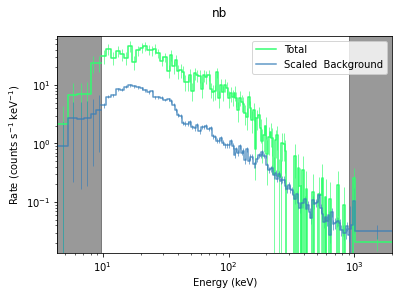

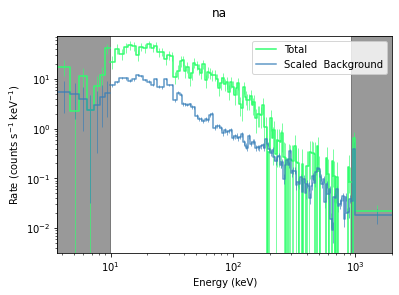

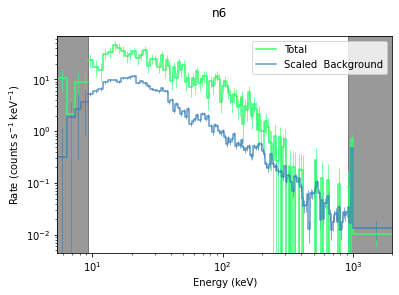

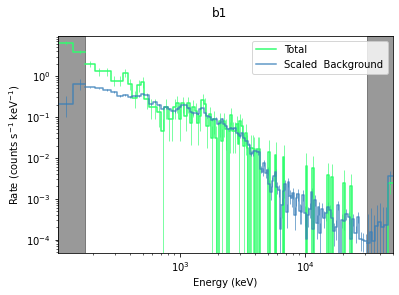

In [25]:
for d in dets:
    fig = datalist[d].view_count_spectrum()
    fig.suptitle(d)

In [27]:
spec = Cutoff_powerlaw()
spec.K.prior = Log_uniform_prior(lower_bound=1e-3, upper_bound=100)
spec.index.set_uninformative_prior(Uniform_prior)
spec.xc.prior = Log_uniform_prior(lower_bound=1, upper_bound=1e3)
spec.pivot=100
ps = PointSource('grb',0,0, spectral_shape=spec)
model = Model(ps)

In [28]:
#bayes = BayesianAnalysis(model, datalist)
#bayes.set_sampler("multinest")

In [29]:
jl = JointLikelihood(model, datalist)
best_fit_parameters, likelihood_values = jl.fit()

Best fit values:



,result,unit
parameter,,
grb.spectrum.main.Cutoff_powerlaw.K,3.8 -0.8 +1.0,1 / (cm2 keV s)
grb.spectrum.main.Cutoff_powerlaw.index,(-7.7 +/- 0.7) x 10^-1,
grb.spectrum.main.Cutoff_powerlaw.xc,(1.16 -0.12 +0.13) x 10^2,keV



Correlation matrix:



1.00,-0.99,0.86
-0.99,1.00,-0.92
0.86,-0.92,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
b1,-16.017256
n6,98.726969
na,116.758671
nb,121.143438
total,320.611821



Values of statistical measures:



,statistical measures
AIC,647.274707
BIC,659.707265



WARNING RuntimeWarning: divide by zero encountered in log


WARNING RuntimeWarning: invalid value encountered in multiply


WARNING RuntimeWarning: divide by zero encountered in log


WARNING RuntimeWarning: invalid value encountered in multiply


WARNING RuntimeWarning: divide by zero encountered in log


WARNING RuntimeWarning: invalid value encountered in multiply


WARNING RuntimeWarning: divide by zero encountered in log


WARNING RuntimeWarning: invalid value encountered in multiply


WARNING RuntimeWarning: invalid value encountered in true_divide



(0.01, 1000.0)

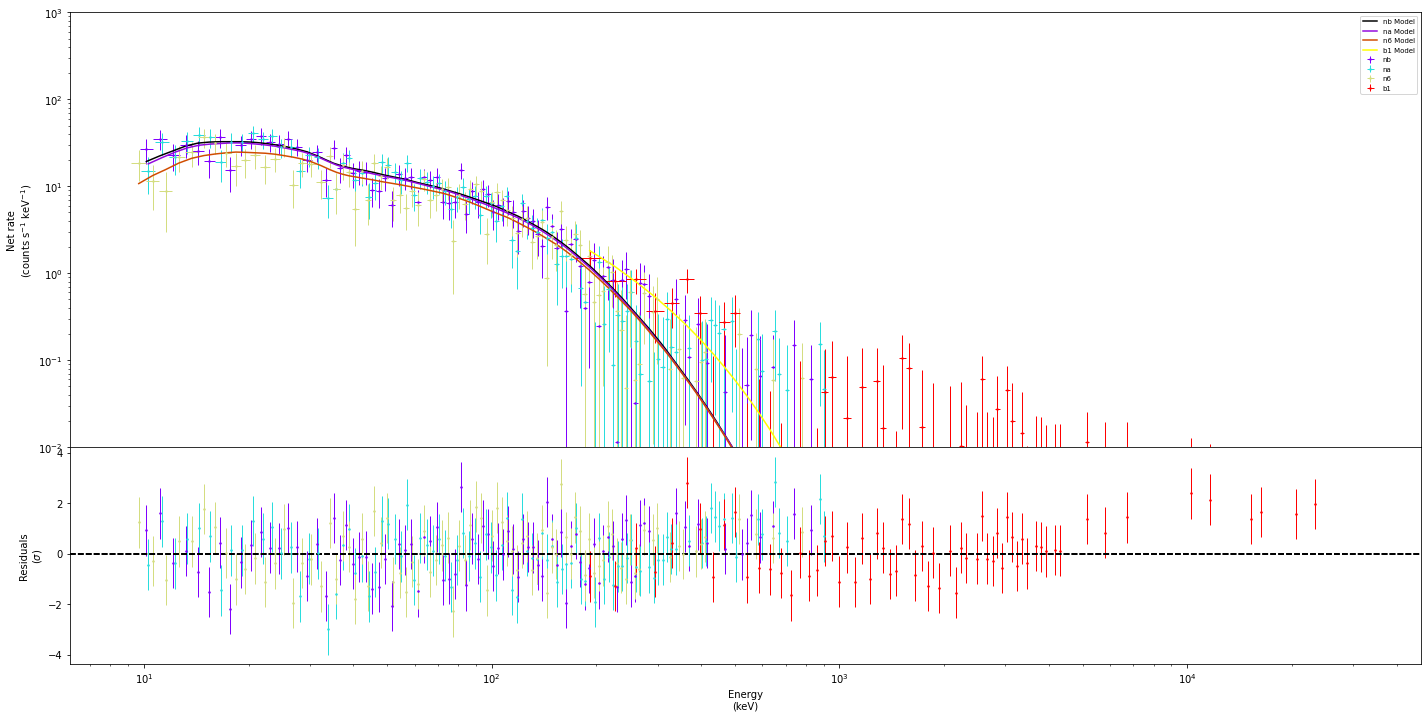

In [31]:
fig = display_spectrum_model_counts(jl, step=False, figsize=(20, 10));
ax = fig.axes[0]
ax.set_ylim(1e-2, 1e3)